<a href="https://colab.research.google.com/github/Rhyme0730/ML-on-predicting-chaotic-systems/blob/main/ML_on_Predicting_chaotic_behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Demonstartion for proposal

## 1.1 Double Pendulum System

In [46]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# Double Pendulum
G = 9.81  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0 # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg
def double_Pendulum(state, t):
    '''
    :param state: state[0]:theta1  state[1]:theta1_dot  state[2]:theta2  state[3]:theta2_dot
           (all with respect to vertical)
    :param t: simulation time
    :return: dydx: derivative of state with respect to time
    '''
    noise = 0.0
    dydx = np.zeros_like(state)
    dydx[0] = state[1]
    del_ = state[2] - state[0] + noise
    den1 = (M1 + M2) * L1 - M2 * L1 * cos(del_) * cos(del_)
    dydx[1] = (M2 * L1 * state[1] * state[1] * sin(del_) * cos(del_) +
               M2 * G * sin(state[2]) * cos(del_) +
               M2 * L2 * state[3] * state[3] * sin(del_) -
               (M1 + M2) * G * sin(state[0])) / den1
    dydx[2] = state[3]
    den2 = (L2 / L1) * den1
    dydx[3] = (-M2 * L2 * state[3] * state[3] * sin(del_) * cos(del_) +
               (M1 + M2) * G * sin(state[0]) * cos(del_) -
               (M1 + M2) * L1 * state[1] * state[1] * sin(del_) -
               (M1 + M2) * G * sin(state[2])) / den2
    dydx = dydx
    return dydx

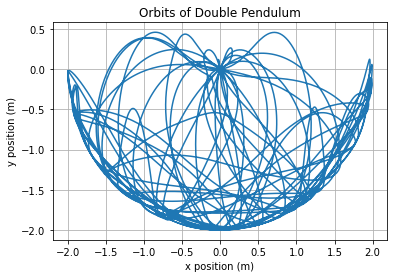

In [47]:
# Time points to solve the system for
dt = 0.01
t = np.arange(0.0, 50.0, dt)  # Turn param 1: Time

# Initial Conditions (Turn param 2)
# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = -90.0
th2 = 90.0
w1 =  0.0
w2 = 0.0
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(double_Pendulum, state, t)

# Pendulum 1 and Pendulum 2 position in Euclidean Coordinate
P1 = np.dstack([L1 * sin(y[:, 0]), -L1 * cos(y[:, 0])]).squeeze()
P2 = P1 + np.dstack([L2 * sin(y[:, 2]), -L2 * cos(y[:, 2])]).squeeze()


plt.figure()
# plt.plot(P1[:, 0], P1[:, 1], label='Pendulum 1')
plt.plot(P2[:, 0], P2[:, 1])
plt.title('Orbits of Double Pendulum')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
# plt.legend()
plt.grid()
plt.show()

## 1.2 Lorenz System

In [48]:
def lorenz_system(state, t, sigma, beta, rho):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

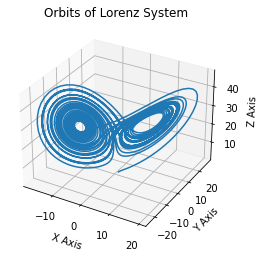

In [49]:
# Lorenz system parameters (Turning params 1)
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# Initial state (Turning params 2)
initial_state = [1.0, 1.0, 1.0]

# Time points to solve the system for
dt = 0.01
t = np.arange(0.0, 40.0, dt)

# Solve the Lorenz system
state_Lorenz = integrate.odeint(lorenz_system, initial_state, t, args=(sigma, beta, rho))
X = state_Lorenz[:, 0]
Y = state_Lorenz[:, 1]
Z = state_Lorenz[:, 2]

# Plotting
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(X, Y, Z)

ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Orbits of Lorenz System")

plt.show()

# 2 Data preprocess

## 2.1 Generate dataset





In [50]:
def generate_pendulum_dataset(th1, th2, t, dt):
  # System params
  G = 9.81  # acceleration due to gravity, in m/s^2
  L1 = 1.0  # length of pendulum 1 in m
  L2 = 1.0 # length of pendulum 2 in m
  M1 = 1.0  # mass of pendulum 1 in kg
  M2 = 1.0  # mass of pendulum 2 in kg

  tspan = np.arange(0.0, t, dt)  # Turn param 1: Time

  # Initial Conditions
  w1 = 0.0
  w2 = 0.0
  initial_state = np.radians([th1, w1, th2, w2])

  y = integrate.odeint(double_Pendulum, initial_state, tspan)

  P1 = np.dstack([L1 * sin(y[:, 0]), -L1 * cos(y[:, 0])]).squeeze()
  P2 = P1 + np.dstack([L2 * sin(y[:, 2]), -L2 * cos(y[:, 2])]).squeeze()

  data1 = np.array([th1*np.ones_like(y[:, 0]), th2*np.ones_like(y[:, 2]), tspan]).T
  data2 =np.concatenate((data1, P1), axis=1)
  data = np.concatenate((data2, P2), axis=1)
  return data

In [51]:
data = []
t = 20
dt = 0.01
th1_rand, th2_rand = np.random.uniform(-180, 180, 2)
data.append(generate_pendulum_dataset(th1_rand, th2_rand, t, dt))

# Concatenate all simulation data into a single array
all_data = np.vstack(data)

# Save to CSV
df = pd.DataFrame(all_data, columns=['theta1', 'theta2', 'time', 'P1_x', 'P1_y', 'P2_x', 'P2_y'])
csv_path = 'double_pendulum_dataset.csv'
df.to_csv(csv_path, index=False)

### Download csv file

In [7]:
from google.colab import files
files.download('double_pendulum_dataset.csv')

ModuleNotFoundError: No module named 'google.colab'

## 2.2 Split dataset to train and test data



In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
all_data = pd.read_csv('double_pendulum_dataset.csv')
all_data = all_data.values   # Column 0: theta1 / 1:theta2 / 2:time / 3: P1_x / 4:P1_y / 5:P2_x / 6:P2_y

index = [2, 3, 4, 5]
X = all_data[:, index]   # extract input feature
y = all_data[:, 6]  # Target output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f'The trainning set size is {X_train.shape},{y_train.shape}')
print(f'The testing set size is {X_test.shape},{y_test.shape}')


The trainning set size is (1500, 4),(1500,)
The testing set size is (500, 4),(500,)


# 3 Build Learning model

## 3.1 Linear Regression

### 3.1.1 Linear Regression (without map)

In [30]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
R2 = reg.score(X_test, y_test)
print(f'The R2 score is {R2}')

# Plot a test angle prediction performance
# th1_plot = -90
# th2_plot = 90
# th_plot = np.full((int(t/dt), 2),[th1_plot, th2_plot])
# tspan = np.array([np.arange(0.0, t, dt)]).T

# X_plot = np.concatenate((th_plot, tspan), axis=1) #Input
# pos_predict = reg.predict(X_plot)

# y = generate_pendulum_dataset(th1_plot, th2_plot, t, dt)

# plt.figure()
# plt.plot(y[:, 3], y[:, 4], label='Actual Orbit')
# plt.plot(pos_predict[:, 0], pos_predict[:, 1], label='Predict Oribit')
# plt.title('Orbits of Double Pendulum')
# plt.xlabel('x position (m)')
# plt.ylabel('y position (m)')
# plt.legend()
# plt.grid()
# plt.show()



The R2 score is 0.0010046677201422383


### 3.1.2 Linear Regression (with map)

X_train dataset size:(1500, 715)
y_train dataset size:(1500,)
X_test dataset size:(500, 715)
y_test dataset size:(500,)
The R2 score is 0.999998802482788


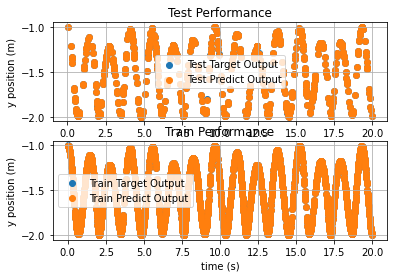

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(9)  # Choose feature size carefully, or it will leads to overfitting
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
print(f'X_train dataset size:{X_train_poly.shape}')
print(f'y_train dataset size:{y_train.shape}')
print(f'X_test dataset size:{X_test_poly.shape}')
print(f'y_test dataset size:{y_test.shape}')

reg_poly = LinearRegression()
reg_poly.fit(X_train_poly, y_train)
R2 = reg_poly.score(X_test_poly, y_test)
print(f'The R2 score is {R2}')


# Performance demo
slice = 500
test_theta = all_data[1, 0:2]
test_predict = reg_poly.predict(X_test_poly)
test_predict = test_predict[0:slice]  
test_target = y_test[0:slice]
test_time = X_test[0:slice, 0]

train_predict = reg_poly.predict(X_train_poly)
train_target = y_train
train_time = X_train[:, 0]

# Plot train and test performance
plt.figure()

plt.subplot(211)
plt.xlabel('time (s)')
plt.ylabel('y position (m)')
plt.scatter(test_time, test_target, label='Test Target Output')
plt.scatter(test_time, test_predict, label='Test Predict Output')
plt.legend()
plt.grid()
plt.title(f'Test Performance')

plt.subplot(212)
plt.xlabel('time (s)')
plt.ylabel('y position (m)')
plt.scatter(train_time, train_predict, label='Train Target Output')
plt.scatter(train_time, train_target, label='Train Predict Output')
plt.legend()
plt.grid()
plt.title(f'Train Performance')
plt.show()

## 3.2 ARIMA

In [ ]:
## James

## For later

## 3.3 Feedforward NN

In [87]:
## James
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

fnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer with a single neuron for regression
])

fnn_model.compile(optimizer='adam', loss='mse')  # Using mean squared error (MSE) as the loss function

history = fnn_model.fit(X_train, y_train, epochs=60, batch_size=32, validation_split=0.2)

mse = fnn_model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)

Epoch 1/60
38/38 [==============================] - 1s 5ms/step - loss: 0.3615 - val_loss: 0.1157
Epoch 2/60
38/38 [==============================] - 0s 2ms/step - loss: 0.0743 - val_loss: 0.0537
Epoch 3/60
38/38 [==============================] - 0s 2ms/step - loss: 0.0365 - val_loss: 0.0540
Epoch 4/60
38/38 [==============================] - 0s 2ms/step - loss: 0.0321 - val_loss: 0.0330
Epoch 5/60
38/38 [==============================] - 0s 2ms/step - loss: 0.0230 - val_loss: 0.0208
Epoch 6/60
38/38 [==============================] - 0s 2ms/step - loss: 0.0177 - val_loss: 0.0201
Epoch 7/60
38/38 [==============================] - 0s 2ms/step - loss: 0.0175 - val_loss: 0.0180
Epoch 8/60
38/38 [==============================] - 0s 2ms/step - loss: 0.0176 - val_loss: 0.0168
Epoch 9/60
38/38 [==============================] - 0s 2ms/step - loss: 0.0177 - val_loss: 0.0188
Epoch 10/60
38/38 [==============================] - 0s 2ms/step - loss: 0.0208 - val_loss: 0.0237
Epoch 11/60
38/38 [

In [88]:
predictions = fnn_model.predict(X_test)

16/16 [==============================] - 0s 831us/step


In [89]:
r2 = r2_score(y_test, predictions)
print("R-squared Score:", r2)

R-squared Score: 0.98115267468946


47/47 [==============================] - 0s 757us/step


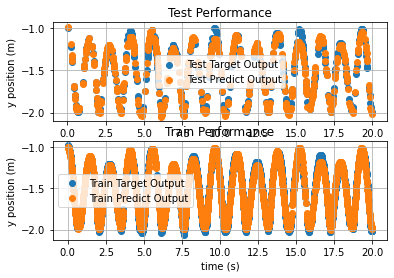

In [90]:
# Performance demo
slice = 500
test_theta = all_data[1, 0:2]
test_predict = fnn_model.predict(X_test)
test_predict = test_predict[0:slice]  
test_target = y_test[0:slice]
test_time = X_test[0:slice, 0]

train_predict = fnn_model.predict(X_train)
train_target = y_train
train_time = X_train[:, 0]

# Plot train and test performance
plt.figure()

plt.subplot(211)
plt.xlabel('time (s)')
plt.ylabel('y position (m)')
plt.scatter(test_time, test_target, label='Test Target Output')
plt.scatter(test_time, test_predict, label='Test Predict Output')
plt.legend()
plt.grid()
plt.title(f'Test Performance')

plt.subplot(212)
plt.xlabel('time (s)')
plt.ylabel('y position (m)')
plt.scatter(train_time, train_predict, label='Train Target Output')
plt.scatter(train_time, train_target, label='Train Predict Output')
plt.legend()
plt.grid()
plt.title(f'Train Performance')
plt.show()

## 3.4 LSTM

In [ ]:
import numpy
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

trainX, trainY = create_dataset(X_train)
testX, testY = create_dataset(X_test)

# Todo: Set Comparing metrics among different learning methods